## Práctica de filtrado
1.  Hagan un código que regrese la primera letra de cada palabra en una lista. (Output es una lista de las primeras letras). 10 palabras en una lista y luego el output que piden
2.  Hagan un código que regrese solamente las palábras con 5 letras o menos de una lista.
3.  Hagan un código que reciba una lista de precios en pesos y los convierta en dólares (Asumir que 20 pesos = 1 dólar).
4.  Si hicieron lo anterior con una función map, reduce o filter; hagan una comprensión.

### EJERCICIO 1

In [46]:
#Funcion
Palabras = ['humano','persona','gente','hombre','mujer','familia','amigo','conocido','colega','pareja','esposo','matrimonio','amor']
print(list(map(lambda char: char[0], Palabras)))

#Comprension
print('------------------------------------------------------------------------------------------------------------------')
paList = [char[0] for char in Palabras]
print(paList)

['h', 'p', 'g', 'h', 'm', 'f', 'a', 'c', 'c', 'p', 'e', 'm', 'a']
------------------------------------------------------------------------------------------------------------------
['h', 'p', 'g', 'h', 'm', 'f', 'a', 'c', 'c', 'p', 'e', 'm', 'a']


### EJERCICIO 2

In [47]:
#Funcion
Palabras = ['humano','persona','gente','hombre','mujer','familia','amigo','conocido','colega','pareja','esposo','matrimonio','amor']
print(list(filter(lambda char: len(char)<=5, Palabras)))

#Comprension
print('------------------------------------------------------------------------------------------------------------------')
paList2=[char for char in Palabras if len(char)<=5]
print(paList2)

['gente', 'mujer', 'amigo', 'amor']
------------------------------------------------------------------------------------------------------------------
['gente', 'mujer', 'amigo', 'amor']


### EJERCICIO 3

In [49]:
#Funcion
import numpy as np
s= np.random.uniform(0,300,15)
print(list(map(lambda x: x*20, s)))

#Comprension
print('------------------------------------------------------------------------------------------------------------------')
paList3=[x*20 for x in s]
print(paList3)

[4525.717763209039, 5033.936340776198, 5594.98254218994, 1107.0523715734073, 4792.7727204418925, 11.00711737725768, 3535.9062801947334, 4751.387872657705, 3666.2818661385, 4476.174821816435, 2519.9389803701306, 1840.1006471678625, 2647.4121095096743, 2157.120579770961, 5056.94925115807]
------------------------------------------------------------------------------------------------------------------
[4525.717763209039, 5033.936340776198, 5594.98254218994, 1107.0523715734073, 4792.7727204418925, 11.00711737725768, 3535.9062801947334, 4751.387872657705, 3666.2818661385, 4476.174821816435, 2519.9389803701306, 1840.1006471678625, 2647.4121095096743, 2157.120579770961, 5056.94925115807]


## BS4
1. Utilizando BeautifulSoup4; scrappea una página de mercado libre con las propiedades: (Nombre del producto, Precio, Precio original, numero de ventas). 
2. Ahora transforma los datos númericos para que sean de type(int) o type(float) en lugar de string 
3. Con esos datos, genera un dataframe.
4. Crea una nueva columna en donde conviertas el precio en pesos a dólares (1 dólar=20 pesos).
5. Guarda el dataframe en un archivo csv.
6. Usando BS4, crea una manera de acceder a las siguientes 2 páginas del departamento en donde te encuentres. (Mercadolibre con las mismas variables).
7. Scrappea las 3 páginas para tener una lista más grande.
8. Nuevamente transforma los datos numéricos para que sean int o float en lugar de string.
9. Genera un dataframe.
10. Crea una nueva columna en donde conviertas el precio de pesos a dólares (1 dólar=20 pesos).
11. Muestra un histograma de la distribución de los precios de celulares.

#### EJERCICIO 1

In [182]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
MCL = 'https://laptops.mercadolibre.com.mx/laptops-accesorios/#menu=categories'
URL = BS(requests.get(MCL).text, "lxml")
#dir(URL)[:20]

In [183]:
listR = URL.find_all('div', class_='item__info-container highlighted')
Nproduct =[]
Precio = []
Oprecio = []
Oprecent=[]
Precent=[]

for i in listR:
    Nproduct.append(i.find('span',class_='main-title').get_text().strip())
    Oprecio.append(i.find('span',class_='price__fraction').get_text().strip())
    discount= i.find('span',class_='price-old', itemprop='price-old')
    if discount == None:
        Precio.append('0')
    else:
        Precio.append(discount.get_text().strip())
        
#EJERCICIO 2

for i in Oprecio:
    z = i.replace(',','')
    Oprecent.append(int(z))        

for i in Precio:
    x = i.replace('$\xa0','')
    y = x.replace(',','')
    Precent.append(float(y))
#print(Nproduct)
#print(Precent)
#print(Oprecent)

#### EJERCICIO 3

In [184]:
D ={
    'Productos':pd.Series(Nproduct),
    'Precio':pd.Series(Precent),
    'Precio Final':pd.Series(Oprecent)
}
df=pd.DataFrame(D)
df

,Productos,Precio,Precio Final
0,Laptop Gamer Fortnite Pubg Mobile Hp 245 G7 Am...,8999.0,7999
1,Laptop Hp 240 Intel Dual Core 4gb 500gb 14 Wif...,5599.0,4999
2,Laptop Hp Intel Ultima Generacion 8gb Delgada ...,0.0,7480
3,Laptop Lenovo 15.6 Core I7 1tb + 16gb Optane 8...,0.0,14999
4,Laptop Acer Spin 3 Core I3 4gb Ssd 128gb 14 To...,7999.0,7139
5,Laptop Samsung Chromebook 3 11.6 16gb Ssd 4gb ...,0.0,3899
6,Laptop Intel Dual Core 4gb Ram 500gb W10 Vorag...,6856.0,4699
7,Laptop Gamer Msi Gf75 Thin 17.3 Gtx1650 4gb Ss...,0.0,25499
8,Laptop Hp 14 Pulgadas 240 G7 2019 Intel Celero...,0.0,5899
9,Laptop Gamer Acer Amd A9 9420e 4gb Ssd 128gb 1...,7899.0,6299


#### EJERCICIO 4

In [176]:
df['Price dlls'] = D['Precio Final'] * 20
#df

#### EJERCICIO 5

In [177]:
df.to_csv(r'C:\Users\Ramiro\Documents\CeroUno\dataframe.csv')

#### EJERCICIO 6

In [186]:
Paginas = URL.find_all('a',class_="andes-pagination__link")
#obtener los textos con href
links= [link.attrs.get("href").strip() for link in Paginas]
#quitando el "enlace" de la primer pagina
links.remove('#')
#obtener solo los links de las siguientes 2 paginas
pags=[]
pags.append(MCL)
for n in links[0:2]:
    pags.append(n)
pags
    

['https://laptops.mercadolibre.com.mx/laptops-accesorios/#menu=categories',
 'https://laptops.mercadolibre.com.mx/laptops-accesorios/_Desde_51',
 'https://laptops.mercadolibre.com.mx/laptops-accesorios/_Desde_101']

#### EJERCICIO 7

In [196]:
#convertire mi scrapeo anterior en una funcion para todas las paginas obtenidas
def scrapeo():
    Nproduct =[]
    Precio = []
    Oprecio = []
    Oprecent=[]
    Precent=[]
    for r in pags:
        URL = BS(requests.get(r).text, "lxml")
        listR = URL.find_all('div', class_='item__info-container highlighted')

        for i in listR:
            Nproduct.append(i.find('span',class_='main-title').get_text().strip())
            Oprecio.append(i.find('span',class_='price__fraction').get_text().strip())
            discount= i.find('span',class_='price-old', itemprop='price-old')
            if discount == None:
                Precio.append('0')
            else:
                Precio.append(discount.get_text().strip())
#ejercicio 8
        for i in Oprecio:
            z = i.replace(',','')
            Oprecent.append(int(z))        

        for i in Precio:
            x = i.replace('$\xa0','')
            y = x.replace(',','')
            Precent.append(float(y))
            

#### EJERCICIO 9

In [195]:
scrapeo()
DF={
    'Productos':pd.Series(Nproduct),
    'Precio':pd.Series(Precent),
    'Precio Final':pd.Series(Oprecent)
}
df2=pd.DataFrame(DF)
df2

https://laptops.mercadolibre.com.mx/laptops-accesorios/#menu=categories
https://laptops.mercadolibre.com.mx/laptops-accesorios/_Desde_51
https://laptops.mercadolibre.com.mx/laptops-accesorios/_Desde_101


,Productos,Precio,Precio Final
0,Laptop Gamer Fortnite Pubg Mobile Hp 245 G7 Am...,8999.0,7999
1,Laptop Hp 240 Intel Dual Core 4gb 500gb 14 Wif...,5599.0,4999
2,Laptop Hp Intel Ultima Generacion 8gb Delgada ...,0.0,7480
3,Laptop Lenovo 15.6 Core I7 1tb + 16gb Optane 8...,0.0,14999
4,Laptop Acer Spin 3 Core I3 4gb Ssd 128gb 14 To...,7999.0,7139
5,Laptop Samsung Chromebook 3 11.6 16gb Ssd 4gb ...,0.0,3899
6,Laptop Intel Dual Core 4gb Ram 500gb W10 Vorag...,6856.0,4699
7,Laptop Gamer Msi Gf75 Thin 17.3 Gtx1650 4gb Ss...,0.0,25499
8,Laptop Hp 14 Pulgadas 240 G7 2019 Intel Celero...,0.0,5899
9,Laptop Gamer Acer Amd A9 9420e 4gb Ssd 128gb 1...,7899.0,6299


#### EJERCICIO 10

In [197]:
df2['Price dlls'] = D['Precio Final'] * 20

#### EJERCICIO 11

In [ ]:
import matplotlib.pyplot as plt

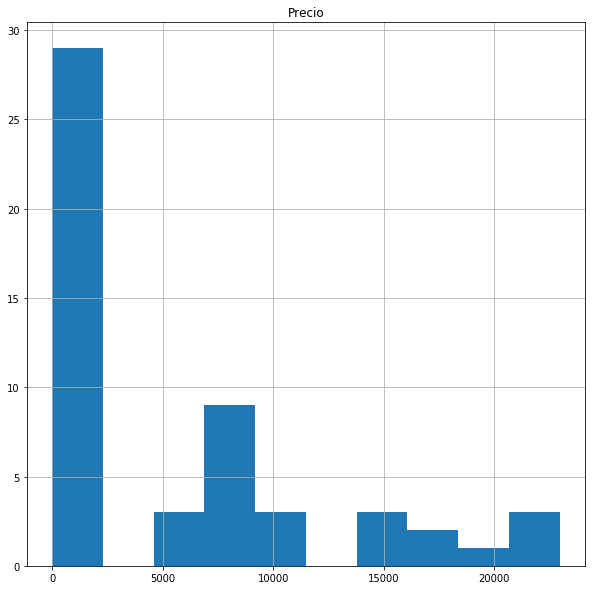

In [203]:
hist= df2.hist('Precio')